# Data Preprocessing

Dataset : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

##################################
        #Loading and Encodign #
####################################

input_file = "Churn_Modelling.csv"

# reading file to pandas dataframe
df_ori = pd.read_csv(input_file, header = 0)
# dropping the unrelated columns
df=df_ori.drop(columns=['CustomerId', 'Surname','RowNumber'])
# Encoding the catogerical features to numerical by replacing their values with numbers
df=df.replace(["Female","Male"],[1,0])
df=df.replace(["France","Spain","Germany",],[0,1,2])
#dataset after manipulation
df



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,2,0,42,3,75075.31,2,1,0,92888.52,1


In [47]:
# original dataset before manipualtion
df_ori

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<AxesSubplot:ylabel='Frequency'>

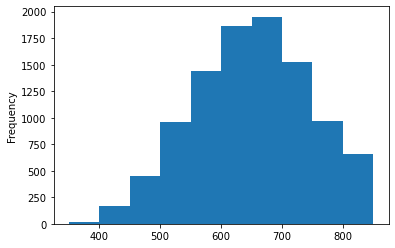

In [22]:
##################################
        #Visualization #
####################################
# Plptting the CreditScore values 
# This plot represents the creditscores versus frequency
#we can see the most fre score is between 600 and 700
df['CreditScore'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

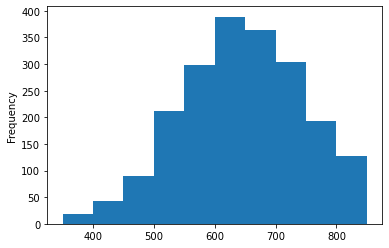

In [26]:
# the credit score of people who left has a similar distrubtion 
#to the overall creditscore distrubtion
df.query('Exited==1')['CreditScore'].plot(kind='hist')



<AxesSubplot:ylabel='Frequency'>

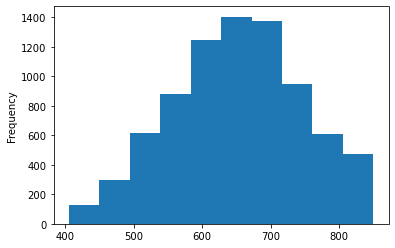

In [27]:
# the credit score of people who did not leave 
#has a similar distrubtion to the overall creditscore distrubtion
df.query('Exited==0')['CreditScore'].plot(kind='hist')


<AxesSubplot:ylabel='Frequency'>

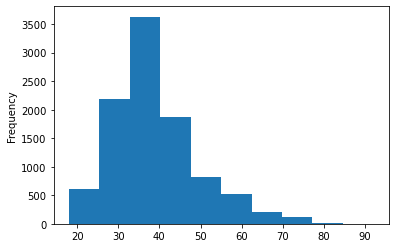

In [28]:
#plotting the overall age distribution
# wee can see most customers have age 30 and 40
df['Age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

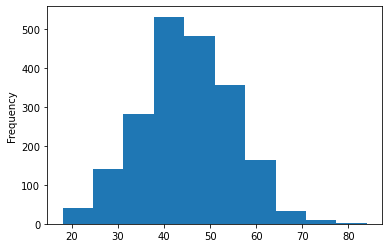

In [29]:
# Most people who exited are have age between 40 and 50
df.query('Exited==1')['Age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

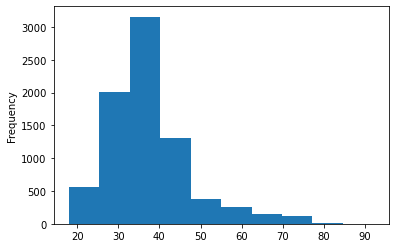

In [30]:
# Most people who stayed have an age between 30 and 40
df.query('Exited==0')['Age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

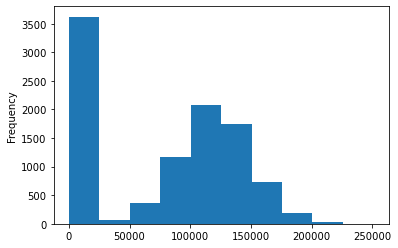

In [31]:
# Plot the overall balance
# msot people have 0 balance
df['Balance'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

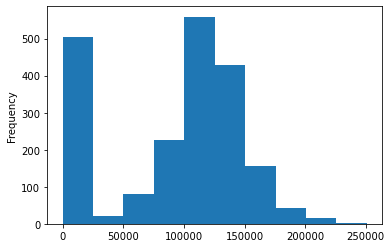

In [32]:

#balance for people who exited
# people who exited have higher balance
df.query('Exited==1')['Balance'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

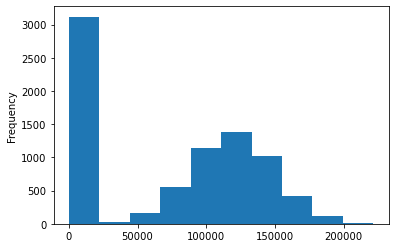

In [33]:
#balance for people who stayed
# people who stayed have less balance
df.query('Exited==0')['Balance'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

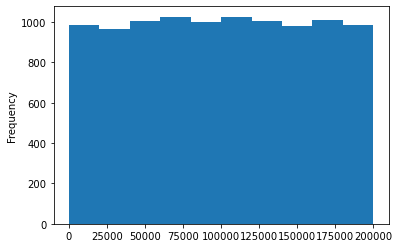

In [35]:
#The distrubtion of estimated salary  for overall 
df['EstimatedSalary'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

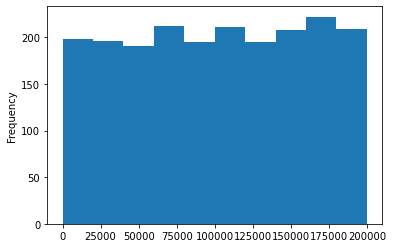

In [37]:
#The distrubtion of estimated salary  for exited

df.query('Exited==1')['EstimatedSalary'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

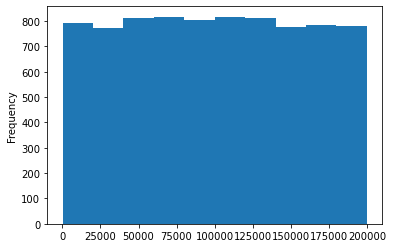

In [36]:
#The distrubtion of estimated salary  for stayed

df.query('Exited==0')['EstimatedSalary'].plot(kind='hist')

In [12]:
# getting how many values we have from each label 
labels=df_ori['Exited'].value_counts()
labels


0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:ylabel='Exited'>

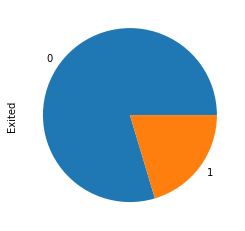

In [14]:
# we can see that data is not balanced as people who exited (1)
#are much less than people who stayed(0)

# We will consider this when we build our model and we
#will try to make the data balanced by chosing a subset of the 0 class
labels.plot(figsize=(6,4), kind='pie')

In [16]:
# how many emails and females we have
gender=df_ori['Gender'].value_counts()
gender

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

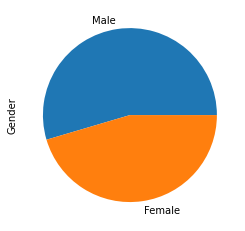

In [17]:
# plotting gender distrubtuion 
gender.plot(figsize=(6,4), kind='pie')

<AxesSubplot:ylabel='Gender'>

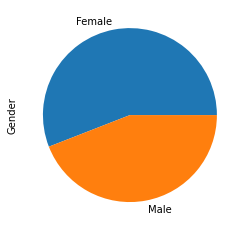

In [40]:
# Gender values for people who exited

df_ori.query('Exited==1')['Gender'].value_counts().plot(figsize=(6,4), kind='pie')

<AxesSubplot:ylabel='Gender'>

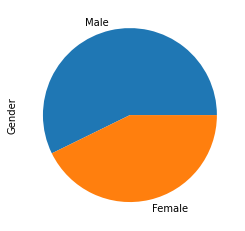

In [41]:
# Gender values for people who stayed
df_ori.query('Exited==0')['Gender'].value_counts().plot(figsize=(6,4), kind='pie')

In [19]:
# getting the geography distrubtion 
geo=df_ori['Geography'].value_counts()
geo


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:>

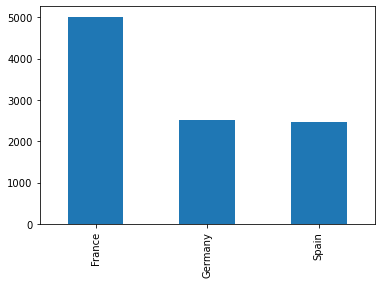

In [38]:
# plotting the geography distribution for overall
geo.plot(figsize=(6,4), kind='bar')


<AxesSubplot:>

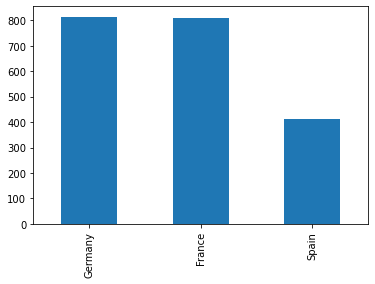

In [46]:
# plotting the geography distribution for exited

df_ori.query('Exited==1')['Geography'].value_counts().plot(figsize=(6,4), kind='bar')



<AxesSubplot:>

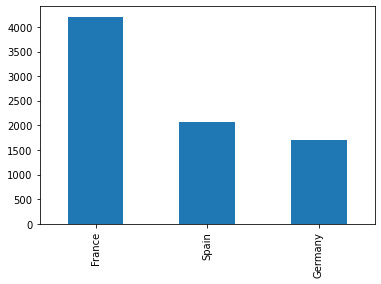

In [44]:
# plotting the geography distribution for stayed

df_ori.query('Exited==0')['Geography'].value_counts().plot(figsize=(6,4), kind='bar')